In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("superheated_vapor_properties.csv")
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2491,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1040,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2873.1000,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.9000,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000


In [4]:
df.set_index("Pressure", inplace = True)
sat_Vap = df["Vap_Sat"]
set1 = sat_Vap[1:300:4]
set2 = sat_Vap[300:1500:4]
set3 = sat_Vap[1500::4]
print(set1)
print(set2)
print(set3)

Pressure
1.000      129200.00
10.000      14670.00
20.000       7649.80
30.000       5229.30
40.000       3993.40
50.000       3240.20
75.000       2216.90
100.000      1693.70
101.325      1673.00
125.000      1374.60
150.000      1159.00
175.000      1003.34
200.000       885.44
225.000       792.97
250.000       718.44
275.000       657.04
300.000       605.56
Name: Vap_Sat, dtype: float64
Pressure
300.0     605.56
325.0     561.75
350.0     524.00
375.0     491.13
400.0     462.22
425.0     436.61
450.0     413.75
475.0     393.22
500.0     374.68
525.0     357.84
550.0     342.48
575.0     328.41
600.0     315.47
625.0     303.54
650.0     292.49
675.0     282.23
700.0     272.68
725.0     263.77
750.0     255.43
775.0     247.61
800.0     240.26
825.0     233.34
850.0     226.81
875.0     220.65
900.0     214.81
925.0     209.28
950.0     204.03
975.0     199.04
1000.0    194.29
1050.0    185.45
1100.0    177.38
1150.0    169.99
1200.0    163.20
1250.0    156.93
1300.0    151.13


In [6]:
def normalize(arr):
    return arr/arr.sum()

**SCRATCH IMPLEMENTATION : <300** 

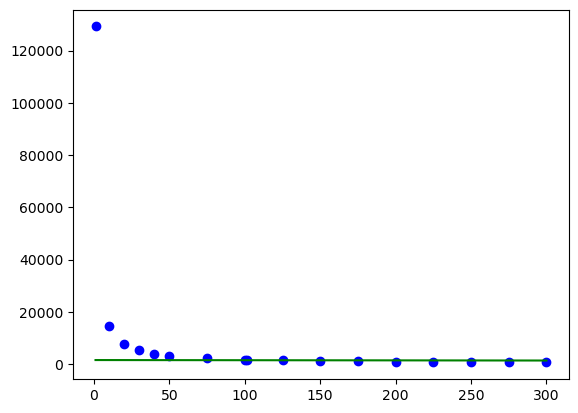

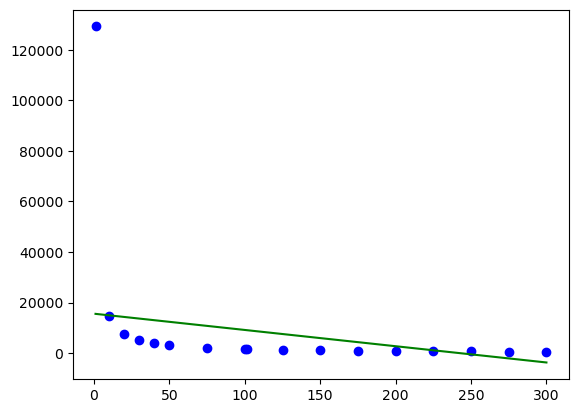

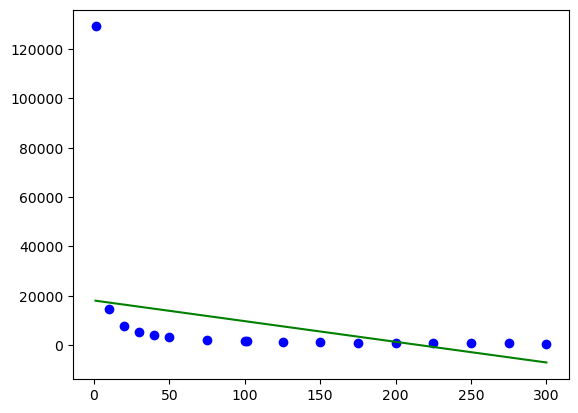

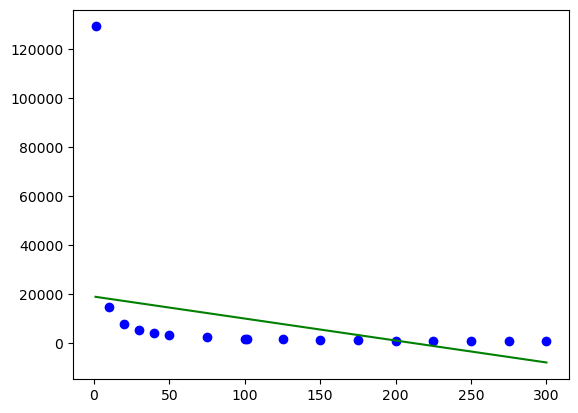

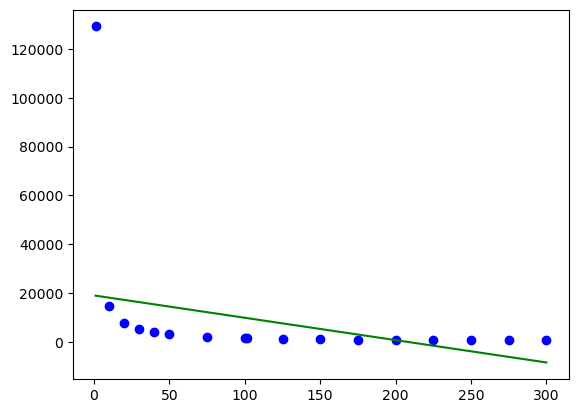

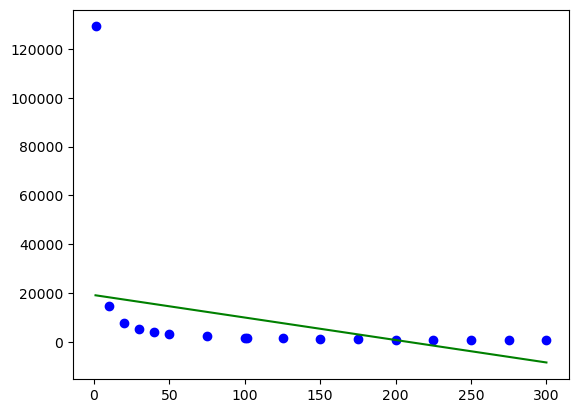

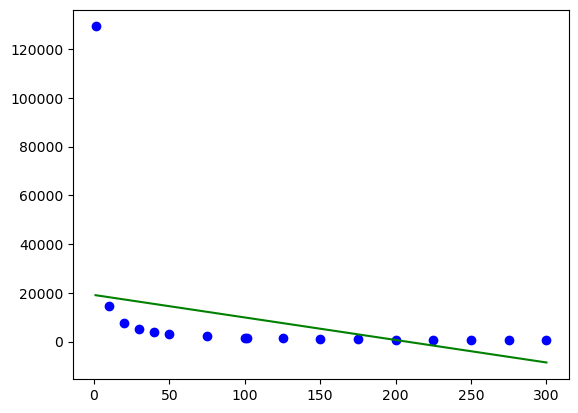

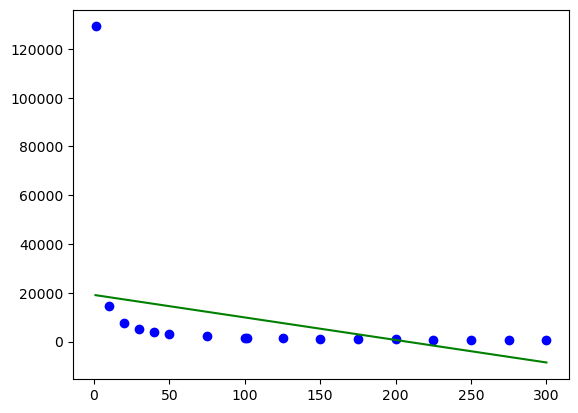

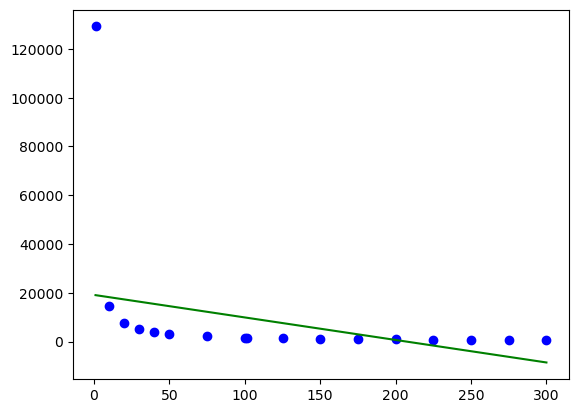

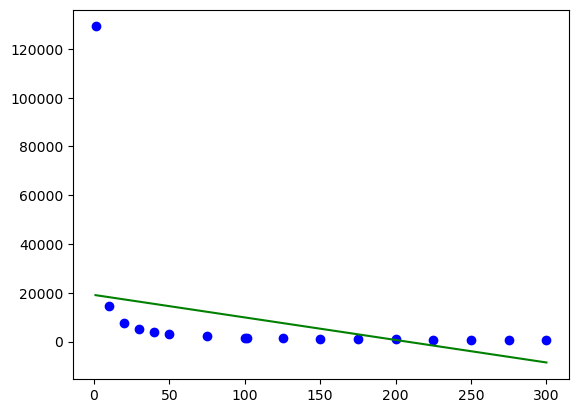

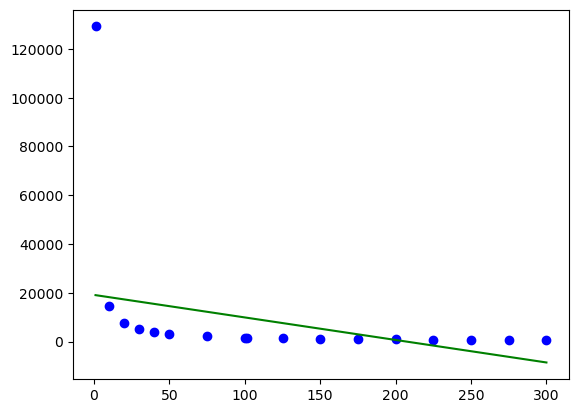

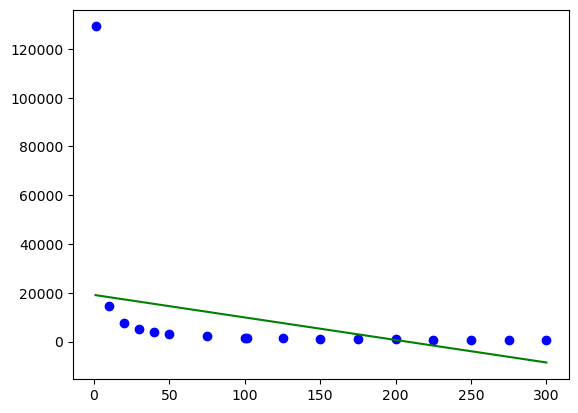

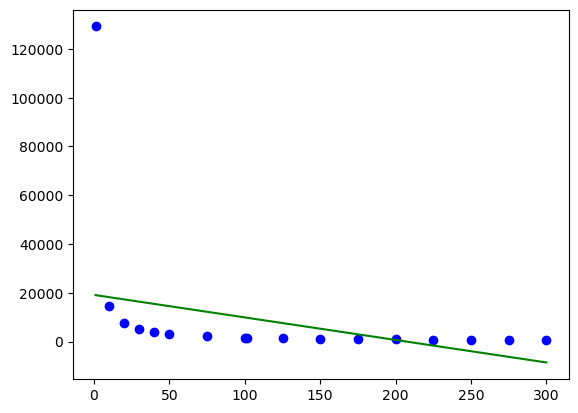

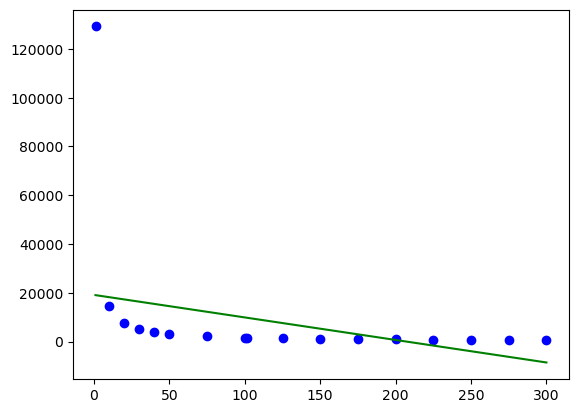

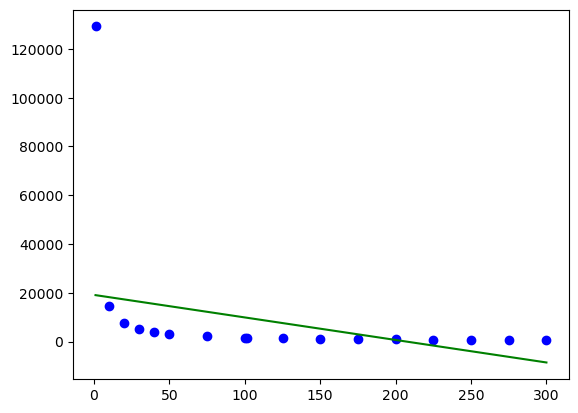

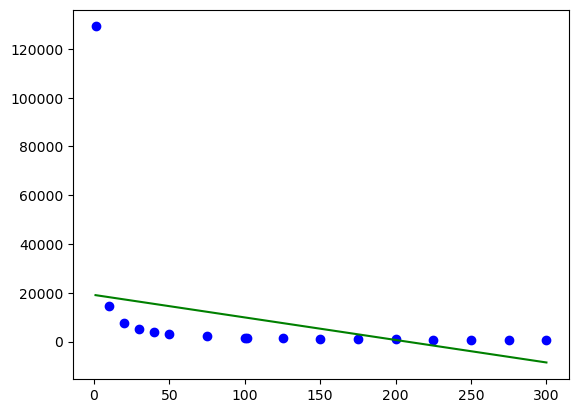

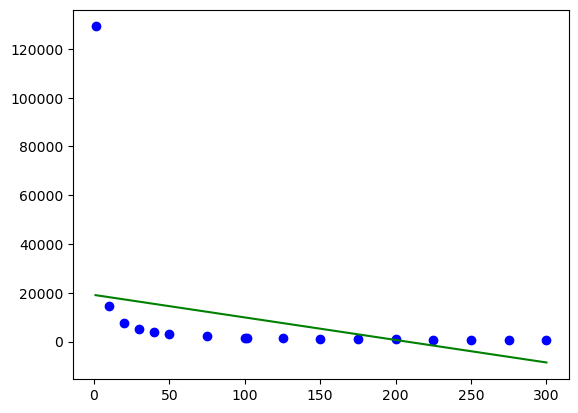

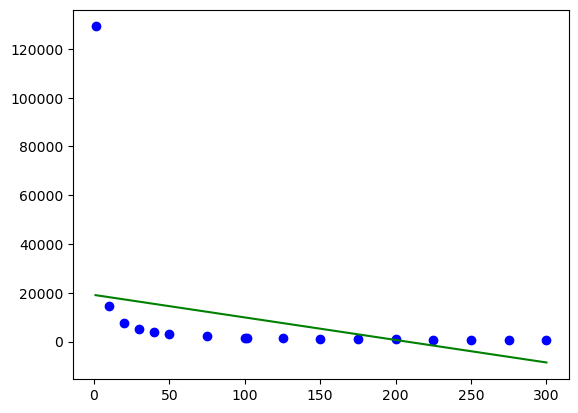

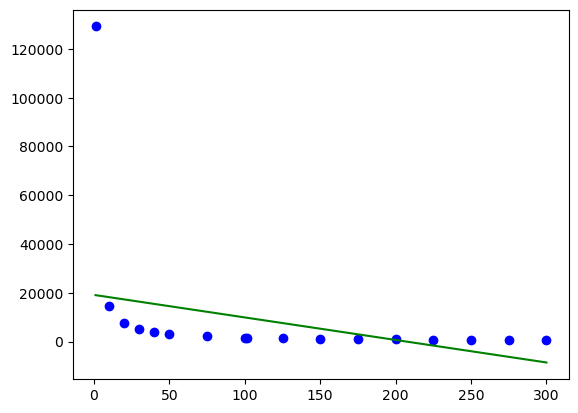

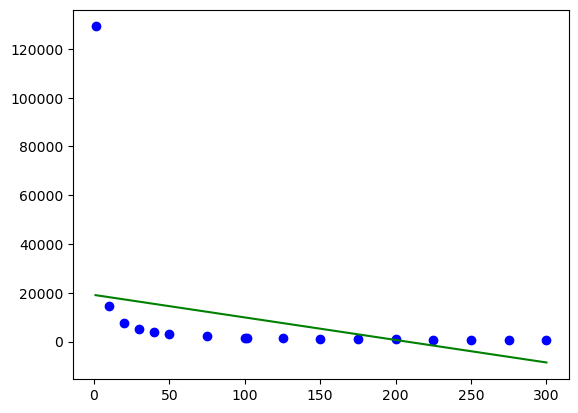

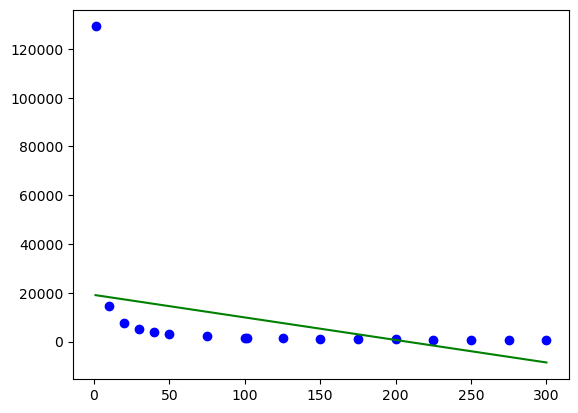

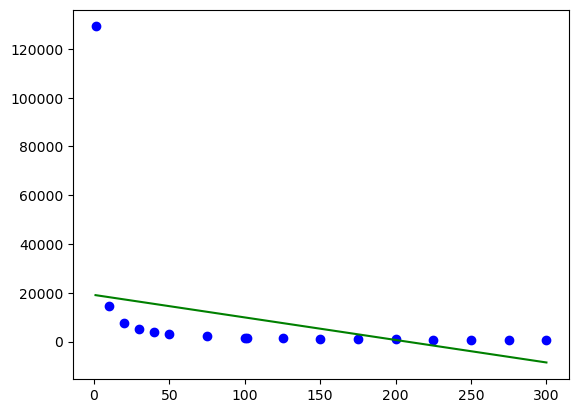

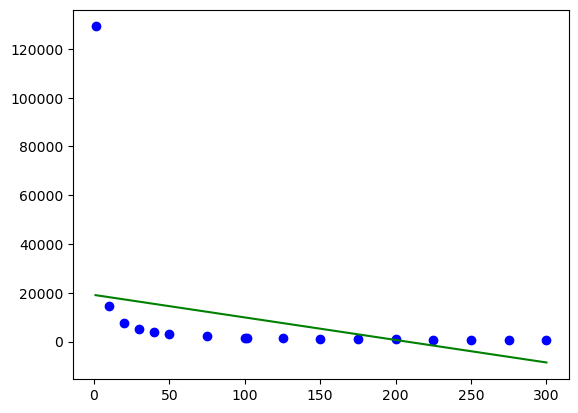

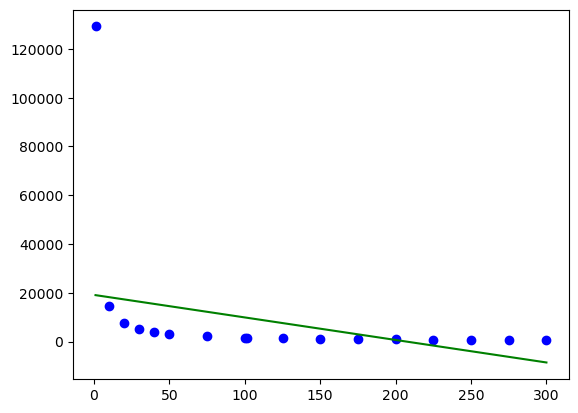

In [12]:
x = set1.index.to_numpy()
y = set1[x].to_numpy()
x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))
lr = 0.1
itr = 70000
m = -0.01
c = 0
y1 = normalize(y)
x1 = normalize(x)
N = len(x)
L1 = []
for i in range(0,itr):
    dm = 2.0/N * (np.sum(np.multiply(m*x1 + c - y1, x1)))
    dc = 2.0/N * np.sum(m*x1+c - y1)
    m -= lr*dm
    c -= lr*dc
    L1.append(np.sum(((m*x1 + c - y1)**2)/N)/N)
    if(i%3000==0):
        plt.plot(x,y,"bo")
        plt.plot(x, (m*x1+c)*y.max(), "g-")
        plt.show()


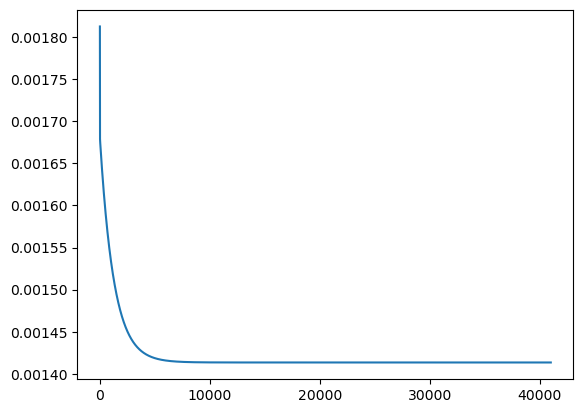

In [6]:
plt.plot(L1)

**SKLEARN IMPLEMENTATION : <300**

[-126.32515403] [26205.72637003]


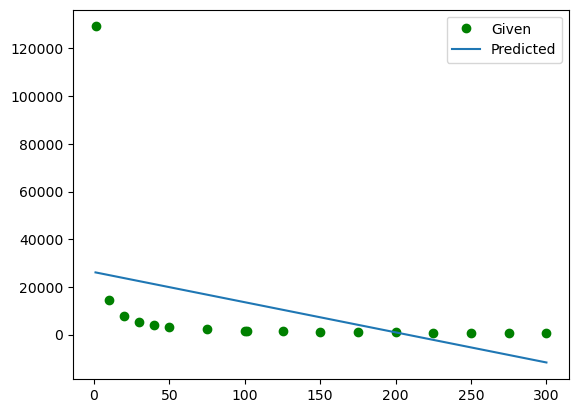

0.16030333166305943

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)
m= linear_regression.coef_[0]
c=linear_regression.intercept_
print(m,c)
y=m*x+c
plt.plot(data,target,"go")
plt.plot(data,y)
plt.legend(["Given","Predicted"])
plt.show()
r2_score(target,y)

**SCRATCH IMPLEMENTATION : 300 < p <1500**

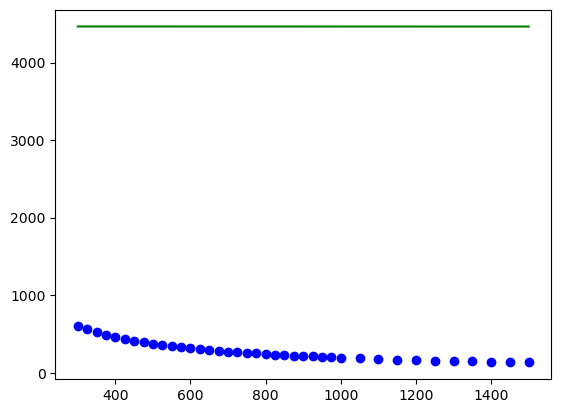

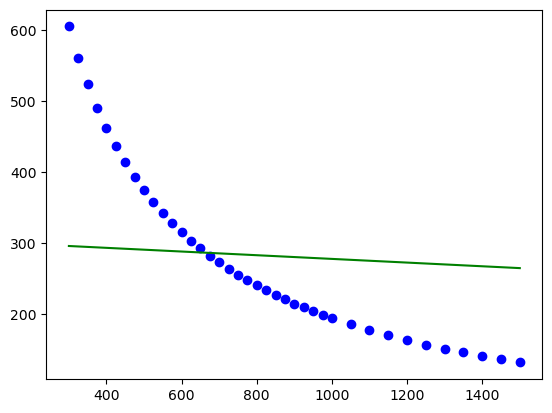

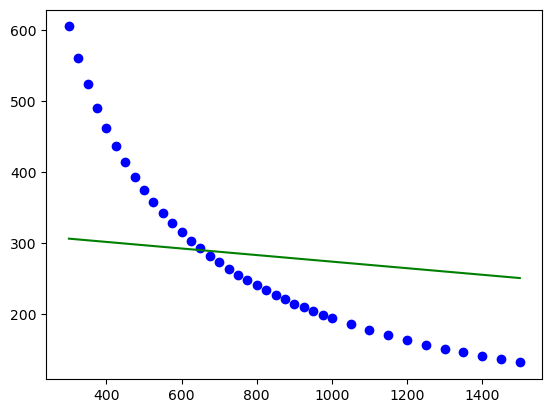

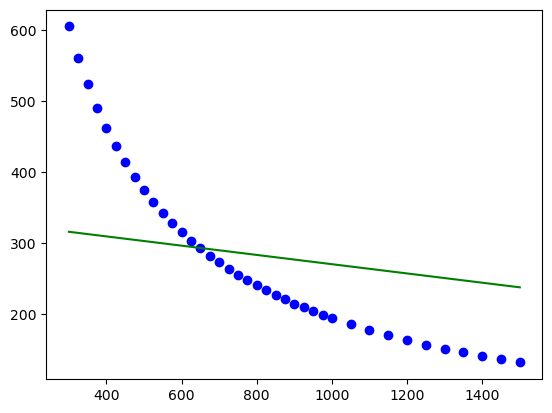

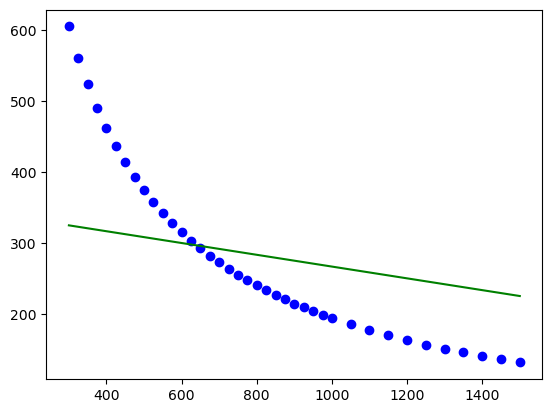

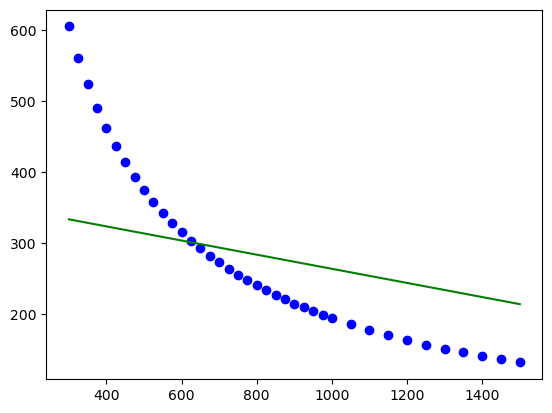

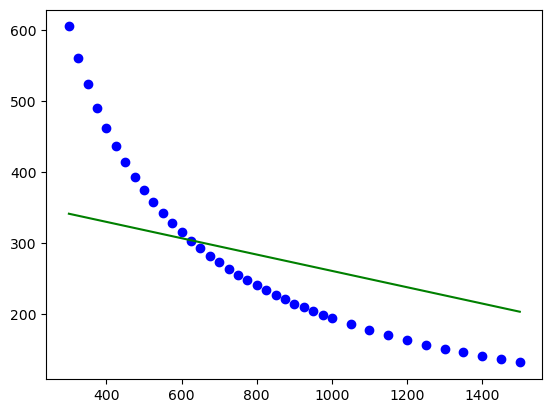

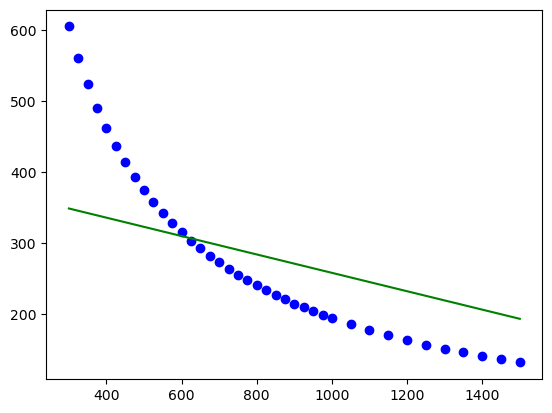

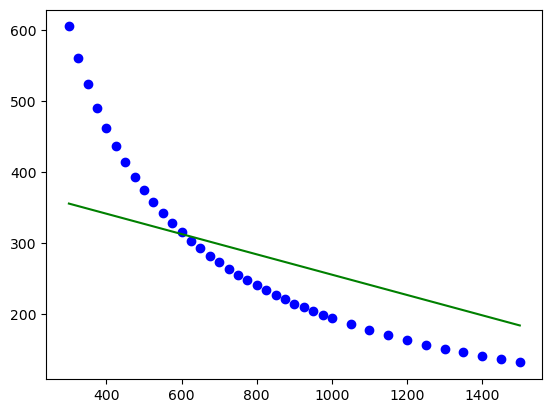

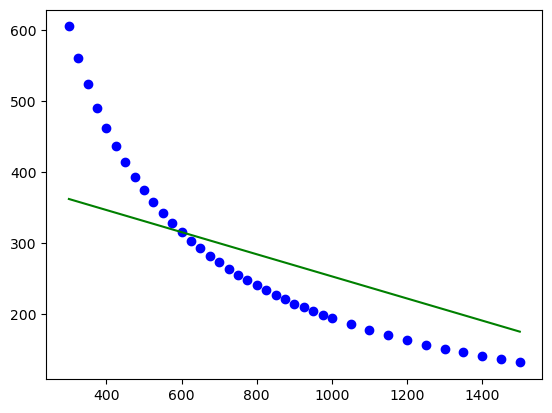

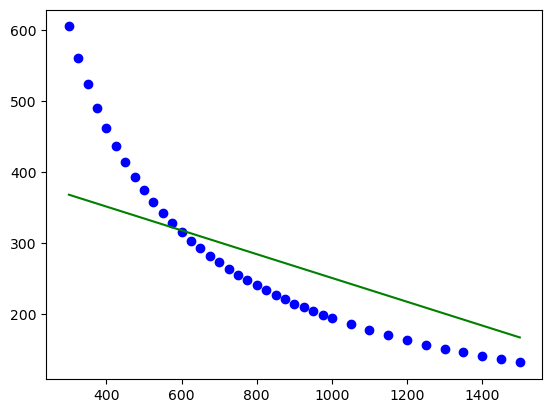

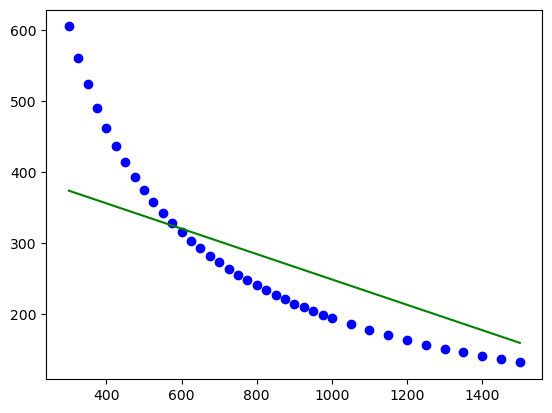

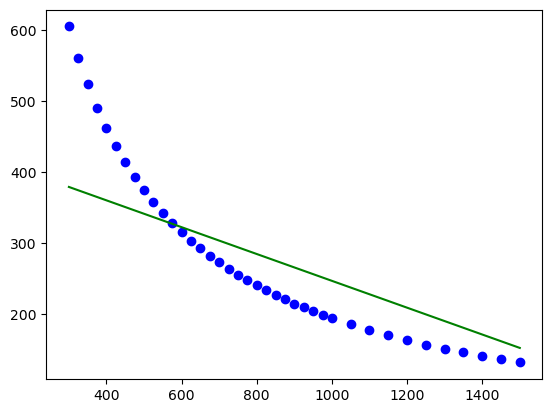

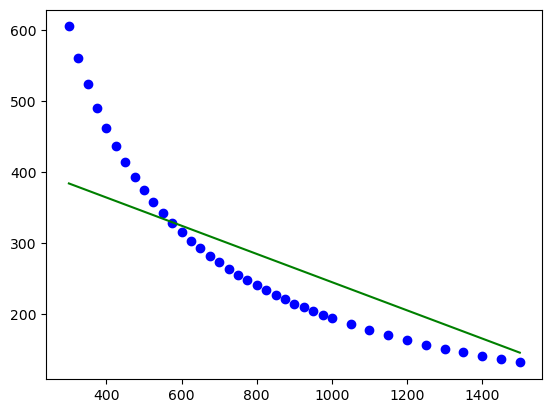

In [8]:
x = set2.index.to_numpy()
y = set2[x].to_numpy()
x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))
l=np.sum(y)
lr = 0.1
itr = 40000
m = -0.000001
c = 0.5
y1 = normalize(y)
x1 = normalize(x)
N = len(x)
L2 = []
for i in range(0,itr):
    dm = 2.0/N * (np.sum(np.multiply(m*x1 + c - y1, x1)))
    dc = 2.0/N * np.sum(m*x1+c - y1)
    m -= lr*dm
    c -= lr*dc
    L2.append(np.sum(((m*x1 + c - y1)**2)/N)/N)
    if(i%3000==0):
        plt.plot(x,y,"bo")
        plt.plot(x, (m*x1+c)*l, "g-")
        plt.show()

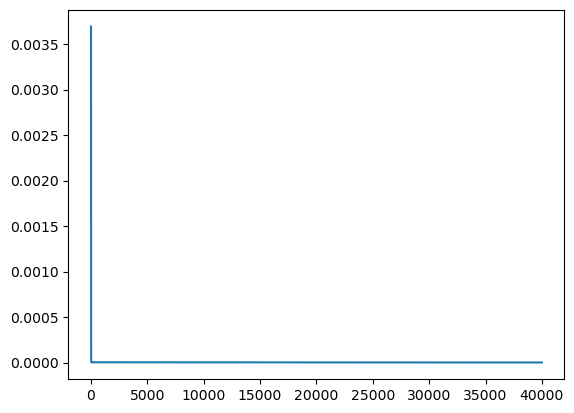

In [9]:
plt.plot(L2)

[-0.33764802] [556.28967719]


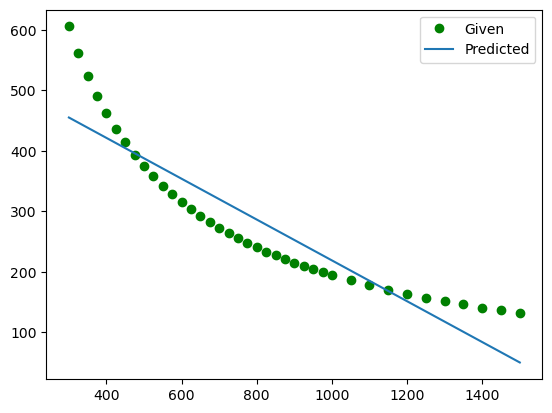

0.8335613390956467

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)
m= linear_regression.coef_[0]
c=linear_regression.intercept_
print(m,c)
y=m*x+c
plt.plot(data,target,"go")
plt.plot(data,y)
plt.legend(["Given","Predicted"])
plt.show()
r2_score(target,y)

**SCRATCH IMPLEMENTATION : 1500<p**

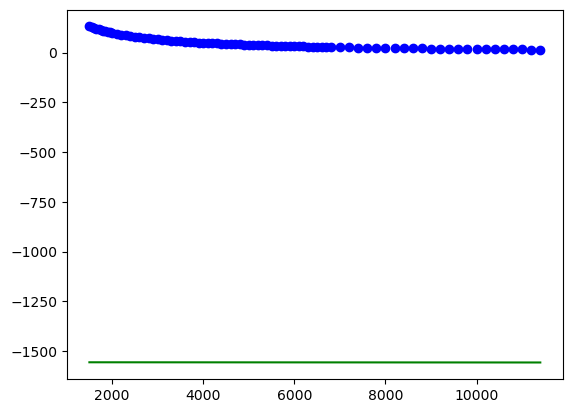

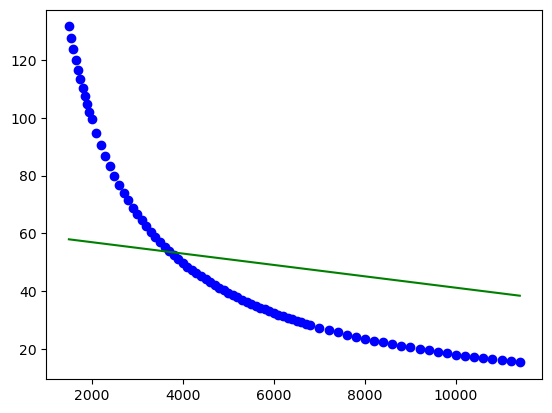

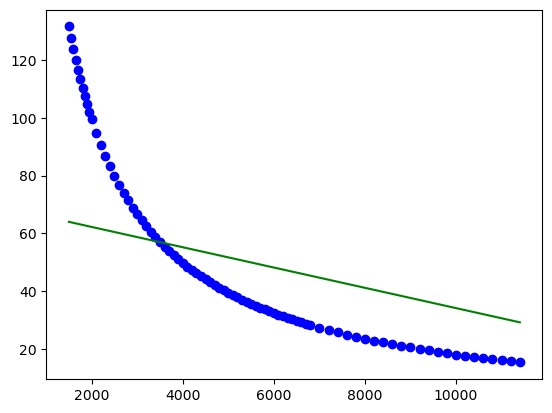

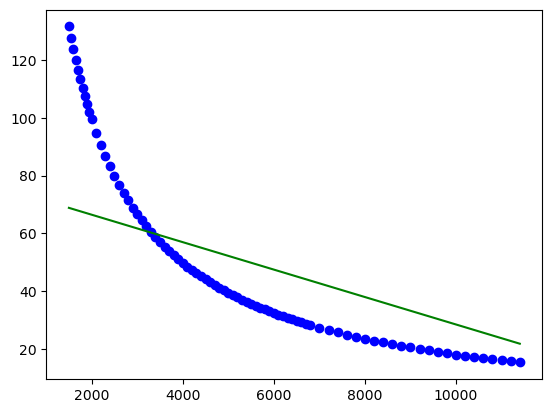

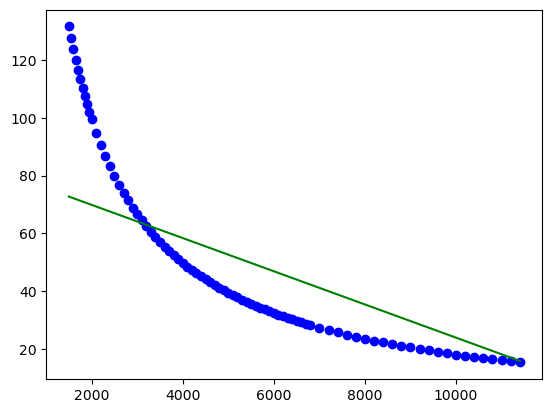

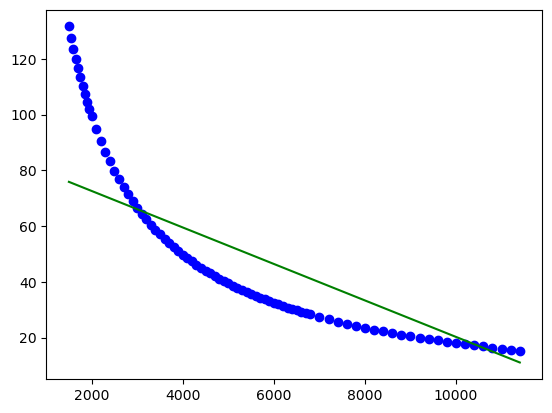

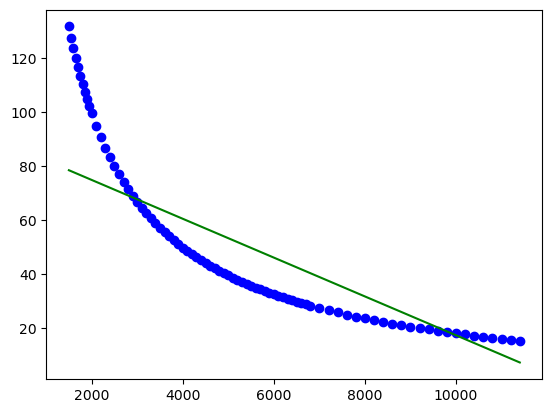

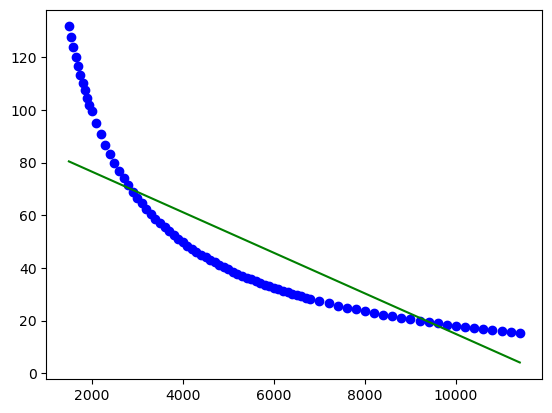

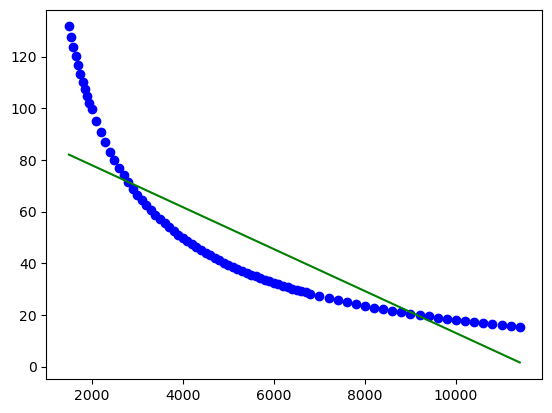

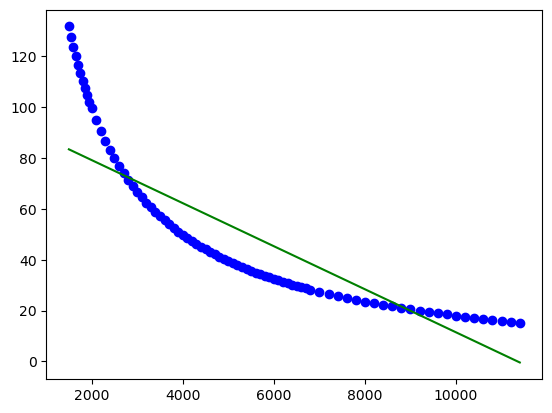

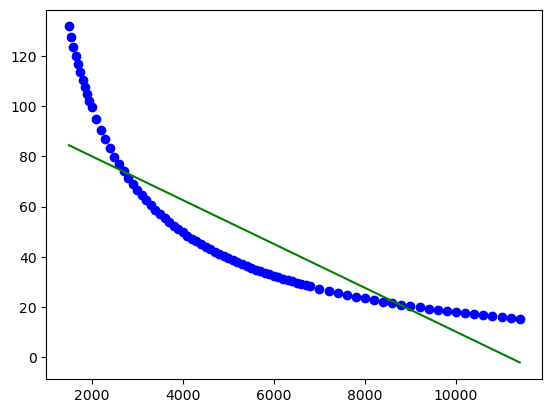

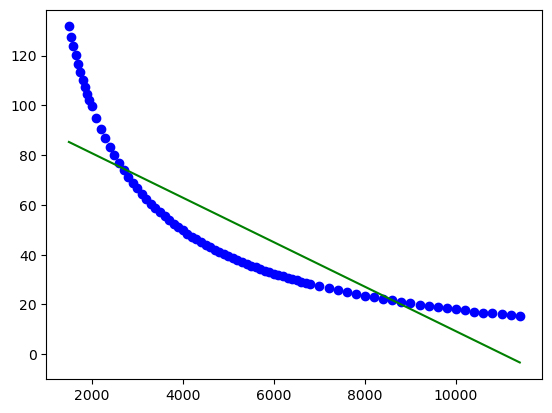

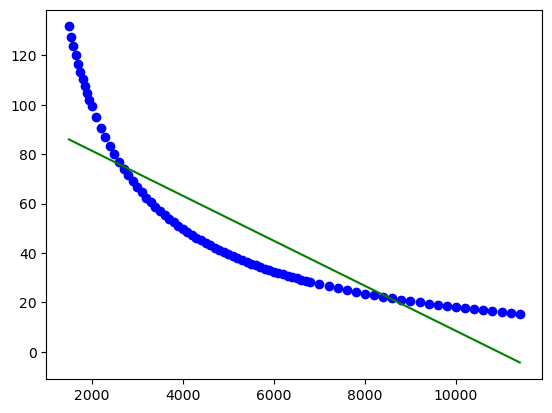

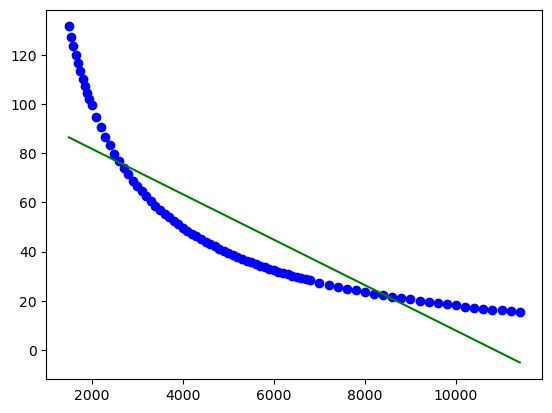

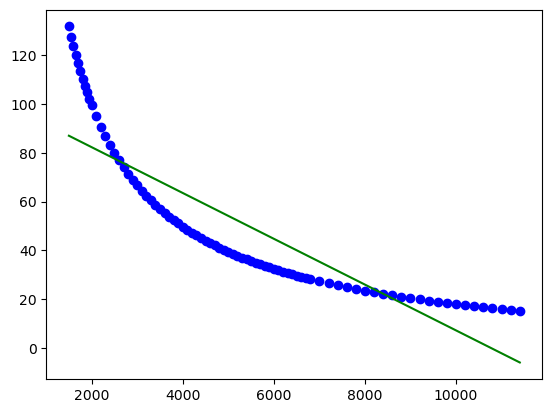

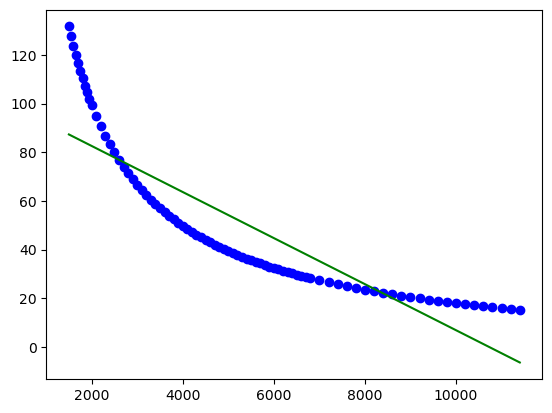

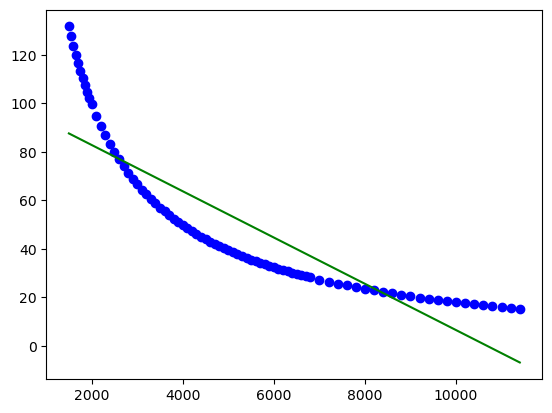

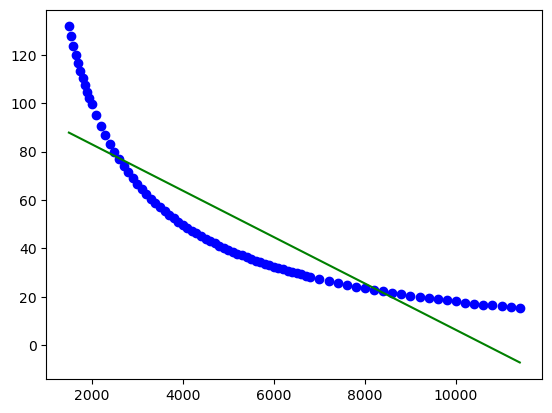

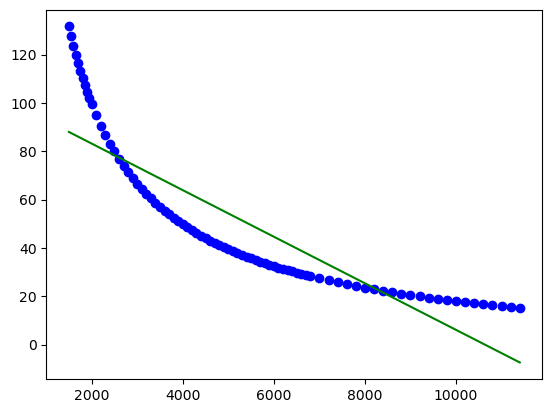

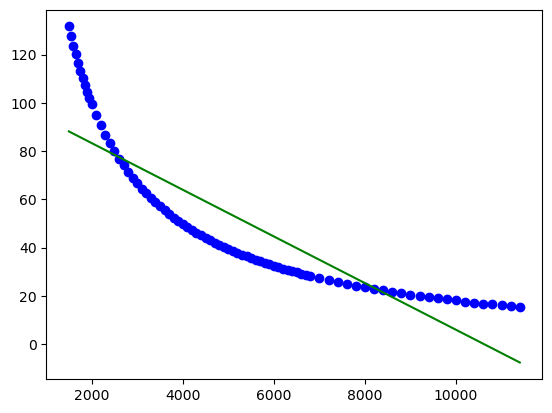

In [11]:
x = set3.index.to_numpy()
y = set3[x].to_numpy()
x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))
l=np.sum(y)
lr = 0.9
itr = 60000
m = -0.000001
c = 0.5
y1 = normalize(y)
x1 = normalize(x)
N = len(x)
L3 = []
for i in range(0,itr):
    dm = 2.0/N * (np.sum(np.multiply(m*x1 + c - y1, x1)))
    dc = 2.0/N * np.sum(m*x1+c - y1)
    m -= lr*dm
    c -= lr*dc
    L3.append(np.sum(((m*x1 + c - y1)**2)/N))
    if(i%3000==0):
        plt.plot(x,y,"bo")
        plt.plot(x, (m*x1+c)*l, "g-")
        plt.show()


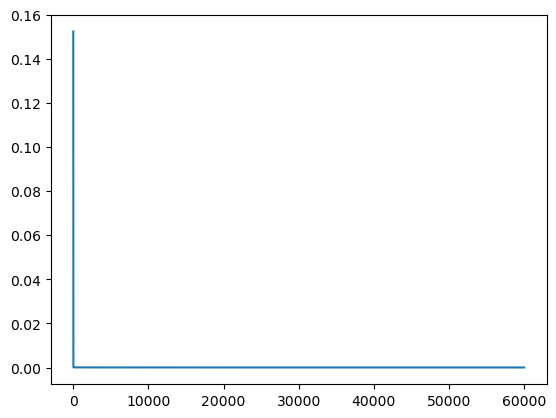

In [12]:
plt.plot(L3)

**SKLEARN : 1500<p**

[-0.00983263] [103.50437059]


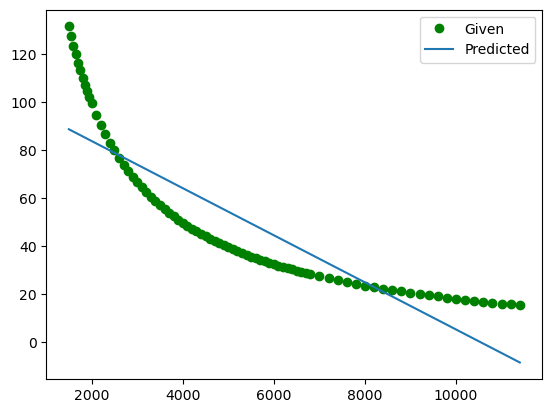

0.7640960509847484

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
target,data=y,x
linear_regression.fit(data, target)
m= linear_regression.coef_[0]
c=linear_regression.intercept_
print(m,c)
y=m*x+c
plt.plot(data,target,"go")
plt.plot(data,y)
plt.legend(["Given","Predicted"])
plt.show()
r2_score(target,y)